In [1]:
import os 
import pandas as pd
import numpy as np

os.chdir("/home/t326h379/OGP")

In [2]:
df_negative_test = pd.read_csv('Feature_Extraction_O_linked_Testing_Negative_11466_Sites_less.txt',header=None)
df_positive_test = pd.read_csv('Feature_Extraction_O_linked_Testing_Positive_375_Sites_less.txt',header=None)

Header_name = ["Position","PID","Position_redundant","81 Window sequence","S or T"]

col_of_feature = [i for i in range(1,1025)]

Header_name = Header_name + col_of_feature

df_positive_test.columns = Header_name

df_negative_test.columns = Header_name


frames_test = [df_positive_test, df_negative_test]

O_linked_testing = pd.concat(frames_test,ignore_index = True)

df_Test_array = O_linked_testing.drop(["Position","PID","Position_redundant","81 Window sequence","S or T"],axis=1)
df_Test_array = np.array(df_Test_array)

X_test_full = df_Test_array

y_test_full = np.array([1]*374+[0]*11466)

In [3]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state = 370381)
X_independent, y_independent = rus.fit_resample(X_test_full,y_test_full)

In [4]:
import tensorflow as tf

In [5]:
model_MLP = tf.keras.models.load_model('Prot_T5_my_model_O_linked_Glycosylation370381Prot_T5_Subash_Salman_Neha.h5')

In [6]:
from sklearn.metrics import roc_curve, roc_auc_score, classification_report,auc
import matplotlib.pyplot as plt

# MLP

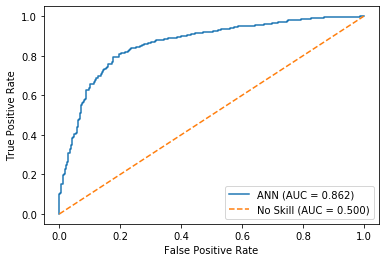

In [7]:
%matplotlib inline

ANN_model_Prob = model_MLP.predict(X_independent)
# keep probabilities for the positive outcome only
ANN_model_Prob = ANN_model_Prob[:,1]

ANN_model_Prob_auc = roc_auc_score(y_independent, ANN_model_Prob)

# plot the roc curve for the model
ns_probs = [0 for _ in range(len(ANN_model_Prob))]

# calculate scores
ns_auc = roc_auc_score(y_independent, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_independent, ns_probs)

ANN_model_fpr, ANN_model_tpr, _ = roc_curve(y_independent, ANN_model_Prob)

plt.plot(ANN_model_fpr, ANN_model_tpr,  label='ANN (AUC = %0.3f)' % ANN_model_Prob_auc)

plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill (AUC = %0.3f)' % ns_auc)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.savefig('O_linked_Glycosylation_ANN_1D_CNN_LR_RF_ROC.png', dpi=350, bbox_inches='tight')
plt.show()

# 1D CNN

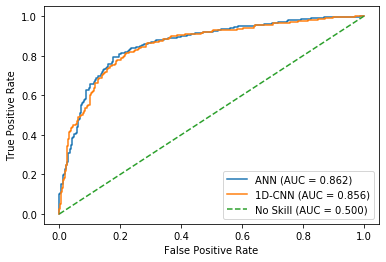

In [28]:
%matplotlib inline

# model_1D_CNN = tf.keras.models.load_model('Prot_T5_my_model_1D_CNN_O_linked_Glycosylation903150Prot_T5_Subash_Salman_Neha.h5')

model_1D_CNN = tf.keras.models.load_model('Prot_T5_my_model_1D_CNN_O_linked_Glycosylation395120Prot_T5_Subash_Salman_Neha.h5')

X_independent_1D_CNN = X_independent.reshape(X_independent.shape[0],1024,1)

One_D_CNN_model_Prob = model_1D_CNN.predict(X_independent_1D_CNN)
# keep probabilities for the positive outcome only
One_D_CNN_model_Prob = One_D_CNN_model_Prob[:,1]

One_D_CNN_model_Prob_model_Prob_auc = roc_auc_score(y_independent, One_D_CNN_model_Prob)

# plot the roc curve for the model
ns_probs = [0 for _ in range(len(One_D_CNN_model_Prob))]

# calculate scores
ns_auc = roc_auc_score(y_independent, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_independent, ns_probs)

One_D_CNN_model_fpr, One_D_CNN_model_tpr, _ = roc_curve(y_independent, One_D_CNN_model_Prob)

plt.plot(ANN_model_fpr, ANN_model_tpr,  label='ANN (AUC = %0.3f)' % ANN_model_Prob_auc)
plt.plot(One_D_CNN_model_fpr, One_D_CNN_model_tpr,  label='1D-CNN (AUC = %0.3f)' % One_D_CNN_model_Prob_model_Prob_auc)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill (AUC = %0.3f)' % ns_auc)


# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.savefig('O_linked_Glycosylation_ANN_1D_CNN_LR_RF_ROC.png', dpi=350, bbox_inches='tight')
plt.show()

# Logistic Regression

In [9]:
import pickle
file = open("Subash_LRLRLR_Prot_T5_model_O_linked_Glycosylation__26__62136Subash_Salman_Neha.h5",'rb')
model_logistic_regression = pickle.load(file)

In [10]:
%matplotlib inline

y_lr_prob = model_logistic_regression.predict_proba(X_independent)[:,1]

lr_model_Prob_auc = roc_auc_score(y_independent, y_lr_prob)

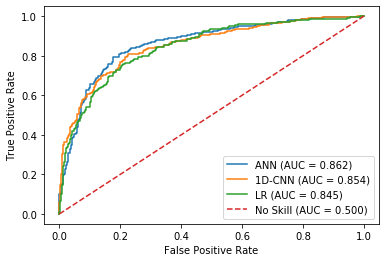

In [11]:
# plot the roc curve for the model
ns_probs = [0 for _ in range(len(y_lr_prob))]

# calculate scores
ns_auc = roc_auc_score(y_independent, ns_probs)
ns_fpr, ns_tpr, _ = roc_curve(y_independent, ns_probs)

lr_model_fpr, lr_model_tpr, _ = roc_curve(y_independent, y_lr_prob)

plt.plot(ANN_model_fpr, ANN_model_tpr,  label='ANN (AUC = %0.3f)' % ANN_model_Prob_auc)
plt.plot(One_D_CNN_model_fpr, One_D_CNN_model_tpr,  label='1D-CNN (AUC = %0.3f)' % One_D_CNN_model_Prob_model_Prob_auc)
plt.plot(lr_model_fpr, lr_model_tpr,  label='LR (AUC = %0.3f)' % lr_model_Prob_auc)
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill (AUC = %0.3f)' % ns_auc)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.savefig('O_linked_Glycosylation_ANN_1D_CNN_LR_RF_ROC.png', dpi=350, bbox_inches='tight')
plt.show()

# XGBoost

In [12]:
import pickle
file = open("Subash_XGBoost_Prot_T5_model_O_linked_Glycosylation__95__421805Subash_Salman_Neha.h5",'rb')
model_XGBoost = pickle.load(file)

In [13]:
%matplotlib inline

y_XGBoost_prob = model_XGBoost.predict_proba(X_independent)[:,1]

XGBoost_model_Prob_auc = roc_auc_score(y_independent, y_XGBoost_prob)

In [14]:
XGBoost_model_fpr, XGBoost_model_tpr, _ = roc_curve(y_independent, y_XGBoost_prob)

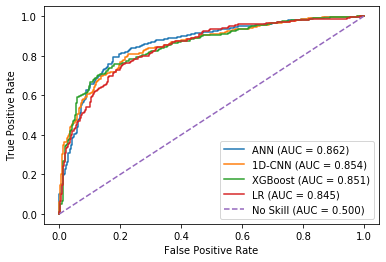

In [15]:
plt.plot(ANN_model_fpr, ANN_model_tpr,  label='ANN (AUC = %0.3f)' % ANN_model_Prob_auc)
plt.plot(One_D_CNN_model_fpr, One_D_CNN_model_tpr,  label='1D-CNN (AUC = %0.3f)' % One_D_CNN_model_Prob_model_Prob_auc)
plt.plot(XGBoost_model_fpr, XGBoost_model_tpr,  label='XGBoost (AUC = %0.3f)' % XGBoost_model_Prob_auc)
plt.plot(lr_model_fpr, lr_model_tpr,  label='LR (AUC = %0.3f)' % lr_model_Prob_auc)


plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill (AUC = %0.3f)' % ns_auc)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.savefig('O_linked_Glycosylation_ANN_1D_CNN_LR_RF_ROC.png', dpi=350, bbox_inches='tight')
plt.show()

# Random Forest

In [16]:
import pickle
file = open("Subash_RFRFRF_Prot_T5_model_O_linked_Glycosylation__84__966164Subash_Salman_Neha.h5",'rb')
model_RF = pickle.load(file)

In [17]:
%matplotlib inline

y_RF_prob = model_RF.predict_proba(X_independent)[:,1]

RF_model_Prob_auc = roc_auc_score(y_independent, y_RF_prob)

In [18]:
RF_model_fpr, RF_model_tpr, _ = roc_curve(y_independent, y_RF_prob)

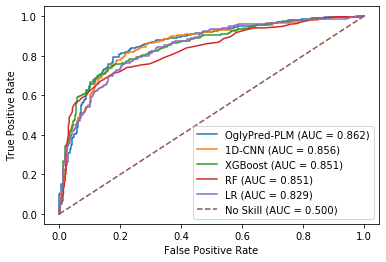

In [32]:
plt.plot(ANN_model_fpr, ANN_model_tpr,  label='OglyPred-PLM (AUC = %0.3f)' % ANN_model_Prob_auc)
plt.plot(One_D_CNN_model_fpr, One_D_CNN_model_tpr,  label='1D-CNN (AUC = %0.3f)' % One_D_CNN_model_Prob_model_Prob_auc)
plt.plot(XGBoost_model_fpr, XGBoost_model_tpr,  label='XGBoost (AUC = %0.3f)' % XGBoost_model_Prob_auc)
plt.plot(RF_model_fpr, RF_model_tpr,  label='RF (AUC = %0.3f)' % XGBoost_model_Prob_auc)
plt.plot(lr_model_fpr, lr_model_tpr,  label='LR (AUC = %0.3f)' % RF_model_Prob_auc)


plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill (AUC = %0.3f)' % ns_auc)

# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.savefig('O_linked_Glycosylation_ANN_1D_CNN_LR_RF_ROC.png', dpi=350, bbox_inches='tight')
plt.show()

In [33]:
pwd

'/home/t326h379/OGP'

# Precision Recall Curve

# MLP

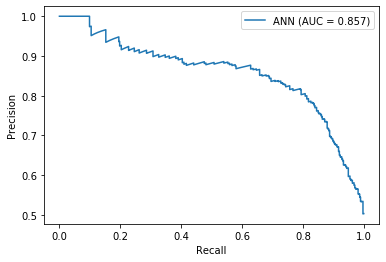

In [21]:
%matplotlib inline
from sklearn.metrics import precision_recall_curve
Y_pred = model_MLP.predict(X_independent)
Y_pred = (Y_pred > 0.5)
y_pred = [np.argmax(y, axis=None, out=None) for y in Y_pred]
y_pred = np.array(y_pred)

y_pred_ANN = y_pred
ANN_model_Prob = model_MLP.predict(X_independent)
# keep probabilities for the positive outcome only
ANN_model_Prob = ANN_model_Prob[:,1]



ANN_model_precision, ANN_model_recall, _ = precision_recall_curve(y_independent, ANN_model_Prob)

ANN_model_auc = auc(ANN_model_recall, ANN_model_precision)

plt.plot(ANN_model_recall, ANN_model_precision,  label='ANN (AUC = %0.3f)' % ANN_model_auc)

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.savefig('PR_CD_HIT_O_linked_Glycosylation_PR_Curve.png', dpi=350, bbox_inches='tight')
plt.show()

# LR

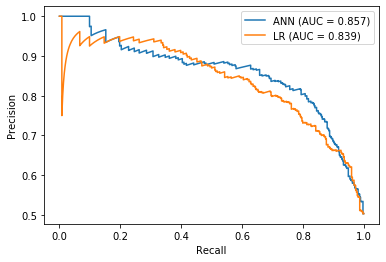

In [22]:
%matplotlib inline

# keep probabilities for the positive outcome only
lr_model_Prob = model_logistic_regression.predict_proba(X_independent)[:,1]

lr_model_precision, lr_model_recall, _ = precision_recall_curve(y_independent, lr_model_Prob)

lr_model_auc = auc(lr_model_recall, lr_model_precision)

plt.plot(ANN_model_recall, ANN_model_precision,  label='ANN (AUC = %0.3f)' % ANN_model_auc)
plt.plot(lr_model_recall, lr_model_precision,  label='LR (AUC = %0.3f)' % lr_model_auc)

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.savefig('PR_CD_HIT_O_linked_Glycosylation_PR_Curve.png', dpi=350, bbox_inches='tight')
plt.show()

# RF

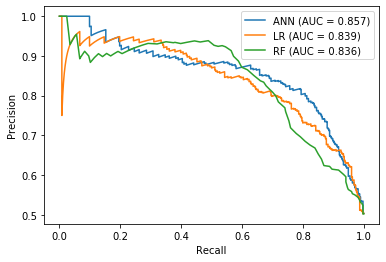

In [24]:
%matplotlib inline

# keep probabilities for the positive outcome only
RF_model_Prob = model_RF.predict_proba(X_independent)[:,1]

RF_model_precision, RF_model_recall, _ = precision_recall_curve(y_independent, RF_model_Prob)

RF_model_auc = auc(RF_model_recall, RF_model_precision)

plt.plot(ANN_model_recall, ANN_model_precision,  label='ANN (AUC = %0.3f)' % ANN_model_auc)
plt.plot(lr_model_recall, lr_model_precision,  label='LR (AUC = %0.3f)' % lr_model_auc)
plt.plot(RF_model_recall, RF_model_precision,  label='RF (AUC = %0.3f)' % RF_model_auc)

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.savefig('PR_CD_HIT_O_linked_Glycosylation_PR_Curve.png', dpi=350, bbox_inches='tight')
plt.show()

# XGBoost

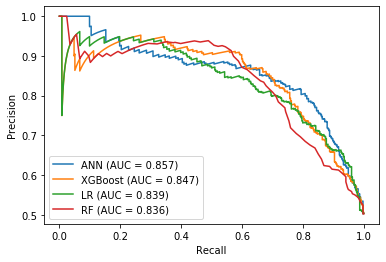

In [26]:
%matplotlib inline

# keep probabilities for the positive outcome only
XGBoost_prob = model_XGBoost.predict_proba(X_independent)[:,1]

XGBoost_model_precision, XGBoost_model_recall, _ = precision_recall_curve(y_independent, XGBoost_prob)

XGBoost_model_auc = auc(XGBoost_model_recall, XGBoost_model_precision)

plt.plot(ANN_model_recall, ANN_model_precision,  label='ANN (AUC = %0.3f)' % ANN_model_auc)
plt.plot(XGBoost_model_recall, XGBoost_model_precision,  label='XGBoost (AUC = %0.3f)' % XGBoost_model_auc)
plt.plot(lr_model_recall, lr_model_precision,  label='LR (AUC = %0.3f)' % lr_model_auc)
plt.plot(RF_model_recall, RF_model_precision,  label='RF (AUC = %0.3f)' % RF_model_auc) 

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.savefig('PR_CD_HIT_O_linked_Glycosylation_PR_Curve.png', dpi=350, bbox_inches='tight')
plt.show()

# 1D-CNN

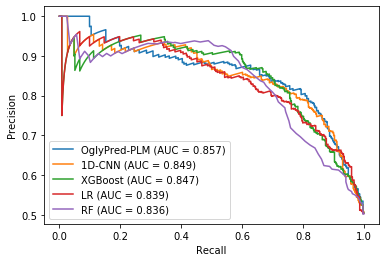

In [31]:
X_independent_1D_CNN = X_independent.reshape(X_independent.shape[0],1024,1)

One_D_CNN_model_Prob = model_1D_CNN.predict(X_independent_1D_CNN)
# keep probabilities for the positive outcome only
One_D_CNN_model_Prob = One_D_CNN_model_Prob[:,1]


One_D_CNN_model_precision, One_D_CNN_model_recall, _ = precision_recall_curve(y_independent, One_D_CNN_model_Prob)

One_D_CNN_model_auc = auc(One_D_CNN_model_recall, One_D_CNN_model_precision)

plt.plot(ANN_model_recall, ANN_model_precision,  label='OglyPred-PLM (AUC = %0.3f)' % ANN_model_auc)
plt.plot(One_D_CNN_model_recall, One_D_CNN_model_precision,  label='1D-CNN (AUC = %0.3f)' % One_D_CNN_model_auc)
plt.plot(XGBoost_model_recall, XGBoost_model_precision,  label='XGBoost (AUC = %0.3f)' % XGBoost_model_auc)
plt.plot(lr_model_recall, lr_model_precision,  label='LR (AUC = %0.3f)' % lr_model_auc)
plt.plot(RF_model_recall, RF_model_precision,  label='RF (AUC = %0.3f)' % RF_model_auc) 

# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.savefig('PR_CD_HIT_O_linked_Glycosylation_PR_Curve.png', dpi=350, bbox_inches='tight')
plt.show()